# Heart Attack Prediction using Machine Learning Algorithms
                                                                                                             By: Sarvesh Bagwe

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart_attack.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Men,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Men,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Women,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Men,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Women,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

# Exploratory Data Analysis

## Data Visualization and Cleaning

<AxesSubplot:xlabel='sex', ylabel='count'>

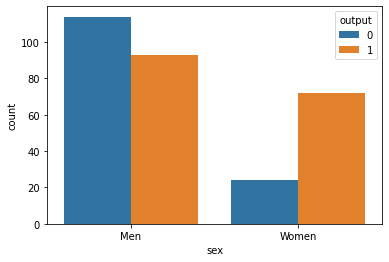

In [5]:
sns.countplot(x='sex',hue="output",data=df)

<Figure size 1000x1700 with 0 Axes>

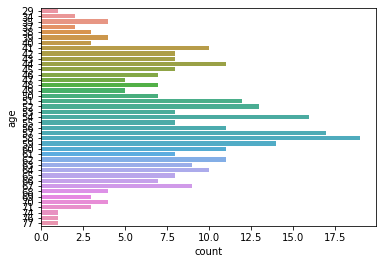

<Figure size 1000x1700 with 0 Axes>

In [6]:
sns.countplot(data=df,y='age')
plt.figure(figsize=(10,17),dpi=100)

c:\Users\lenovo\Desktop\ML_Project\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

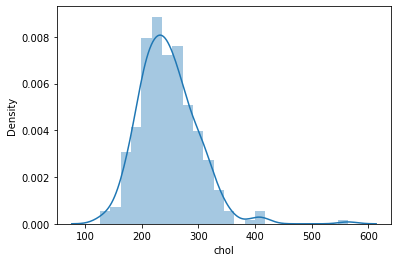

In [7]:
sns.distplot(a=df['chol'],kde=True)

c:\Users\lenovo\Desktop\ML_Project\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trtbps', ylabel='Density'>

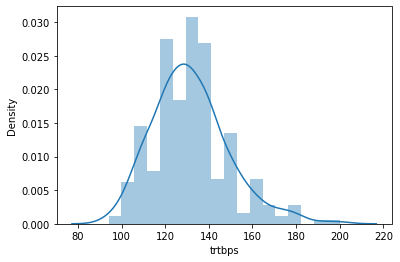

In [8]:
sns.distplot(a=df['trtbps'])

c:\Users\lenovo\Desktop\ML_Project\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

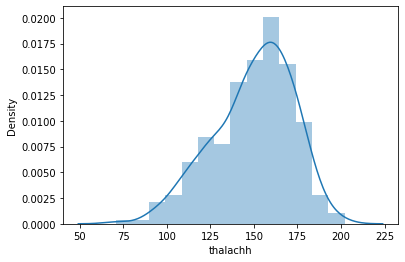

In [9]:
sns.distplot(a=df["thalachh"],kde=True)

c:\Users\lenovo\Desktop\ML_Project\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

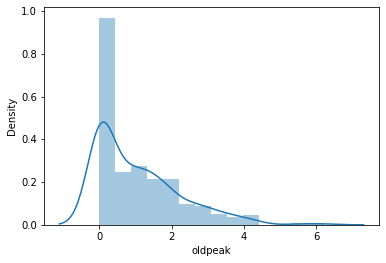

In [10]:
sns.distplot(a=df["oldpeak"],kde=True)

<AxesSubplot:xlabel='sex', ylabel='age'>

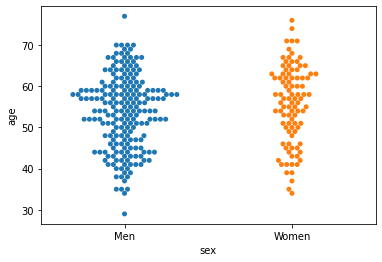

In [11]:
sns.swarmplot(x=df["sex"],y=df['age'])

<AxesSubplot:xlabel='sex', ylabel='age'>

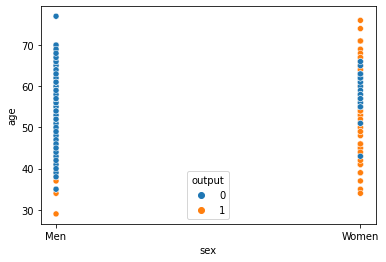

In [12]:
sns.scatterplot(x=df['sex'],y=df['age'],hue=df['output'])

<AxesSubplot:xlabel='age', ylabel='chol'>

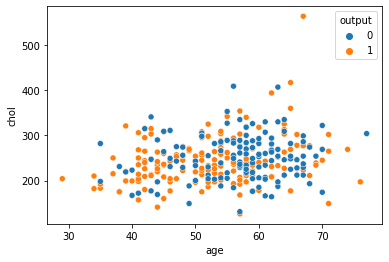

In [13]:
sns.scatterplot(x=df['age'],y=df['chol'],hue=df['output'])

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

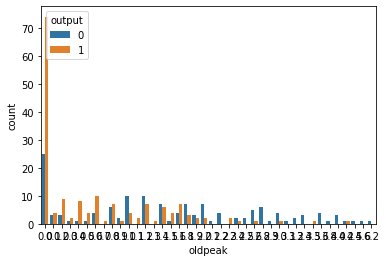

In [14]:
sns.countplot(x='oldpeak',hue="output",data=df)

<AxesSubplot:xlabel='age', ylabel='oldpeak'>

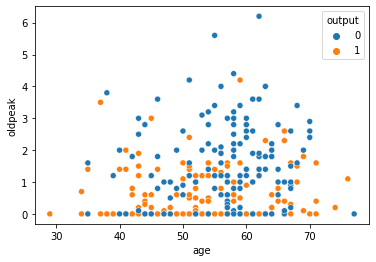

In [15]:
sns.scatterplot(x=df['age'],y=df['oldpeak'],hue=df['output'])

<AxesSubplot:xlabel='age', ylabel='thalachh'>

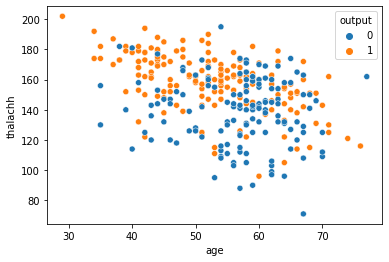

In [16]:
sns.scatterplot(x=df['age'],y=df['thalachh'],hue=df['output'])

<AxesSubplot:xlabel='age', ylabel='trtbps'>

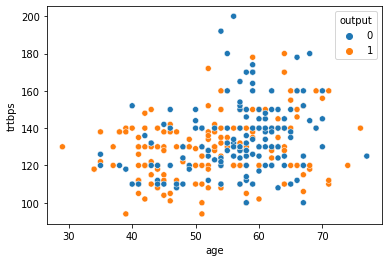

In [17]:
sns.scatterplot(x=df['age'],y=df['trtbps'],hue=df['output'])

## 
- Majority of people belong to 40-60 age group
- Majority people have oldpeak 0
- people with high cholestrol level are more prone to heart attack
- Higher age people have more risk of having heart attack
- chol level 200-300 is the danger range for age group 40-60
- People with oldpeak 0-1.5 are more prone to heart attack irrespective of age
- Higher the value of thalachh more prone to heart attack irrespective of age
- Risk range in trtbps for age group 35-50 is between 100-140 people with this range are more susceptible 

# Ordinal Encoding for categorical data 

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df["Gender"] = enc.fit_transform(df[["sex"]])
df.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Gender
0,63,Men,3,145,233,1,0,150,0,2.3,0,0,1,1,0.0
1,37,Men,2,130,250,0,1,187,0,3.5,0,0,2,1,0.0
2,41,Women,1,130,204,0,0,172,0,1.4,2,0,2,1,1.0
3,56,Men,1,120,236,0,1,178,0,0.8,2,0,2,1,0.0
4,57,Women,0,120,354,0,1,163,1,0.6,2,0,2,1,1.0


In [19]:
df.drop("sex",axis=1,inplace=True)

### Finding Correlation Matrix

In [20]:
corr_matrix = df.corr()
corr_matrix['output'].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
Gender      0.280937
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [21]:
y=df.output
df.drop("output",axis=1,inplace=True)
x=df

## Train set and Test set splitting

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=31)



## Data Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


### Here we are using standard scaler so as all the data in data frame will be in range 0-1 so that significance of each featured can be known properly by the model

# Model Training

## 1) Logistic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(random_state = 1)

Log.fit(X_train, y_train)
y_pred = Log.predict(X_test)
from sklearn.metrics import accuracy_score
acc =accuracy_score(y_test,y_pred)
print("Accuracy: ",acc*100,"%")

Accuracy:  86.95652173913044 %


## 2) Random Forest Classifier 

Text(0, 0.5, 'Error Rate')

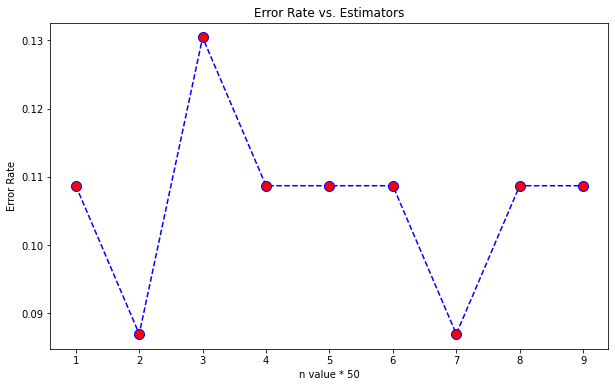

In [25]:
from sklearn.ensemble import RandomForestClassifier
error_rate = []
estimator=[50,100,150,200,250,300,350,400,450]
for i in estimator:
	
	RFC=RandomForestClassifier(n_estimators=i)
	RFC.fit(X_train, y_train)
	pred_i = RFC.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 10), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. Estimators')
plt.xlabel('n value * 50')
plt.ylabel('Error Rate')

### Error rate is less at 6 i.e 6*50=300 so the value of n_estimators should be 300 as keeping it to 350 might overfit the data 

In [26]:

RFC=RandomForestClassifier(n_estimators=300)
RFC.fit(X_train,y_train)
y_pred_1=RFC.predict(X_test)


In [27]:
acc1=accuracy_score(y_pred_1,y_test)
print("Accuracy: ",acc1*100,"%")

Accuracy:  91.30434782608695 %


## 3) Support Vector Machine

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred_2 = svclassifier.predict(X_test)


In [29]:
acc2=accuracy_score(y_pred_2,y_test)
print("Accuracy: ",acc2*100,"%")

Accuracy:  86.95652173913044 %


# Model performance Analysis

In [30]:
Acc_score = pd.DataFrame({"Model" : ["Logistic Regression","RandomForestClassifier","Support Vector Machine"], 
                     "Accuracy" : [acc,acc1,acc2]})
Acc_score

,Model,Accuracy
0,Logistic Regression,0.869565
1,RandomForestClassifier,0.913043
2,Support Vector Machine,0.869565


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

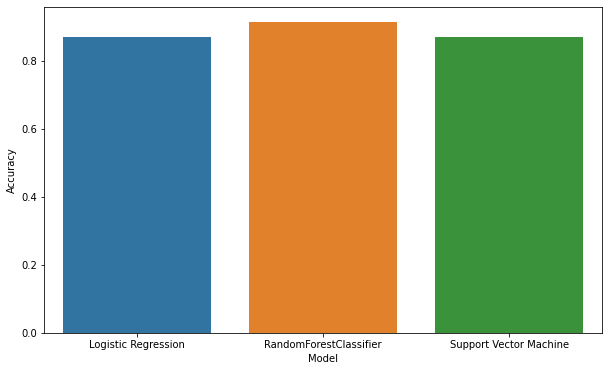

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=Acc_score["Model"],y=Acc_score["Accuracy"])